In [1]:
# Import all data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Size the plot appropriately for online display
plt.rcParams['figure.figsize'] = (12.0, 10.0)

# Only read up to 4096 bytes, > 4096 has 100% malware rate
MAX_SIZE = 4096
TOTAL_ROWS = 113636
USE_COLS = list(range(2, MAX_SIZE))
ROWS = TOTAL_ROWS

train = pd.read_csv("./data/train.zip", nrows=ROWS, usecols=USE_COLS, header=None, names = list(range(0, MAX_SIZE)))
train_label = pd.read_csv("./data/train_label.csv", usecols=[1], nrows=ROWS)

# train = train.fillna(0, downcast='infer')
assert train.shape[0] == train_label.shape[0], "Train and label shapes are different"

In [2]:
train.head(10)

,2,3,4,5,6,7,8,9,10,11,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,144,0,3,0,0,0,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,64,0,1,0,0,0,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,144,0,3,0,0,0,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,144,0,3,0,0,0,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mask = np.random.rand(len(train)) < 0.8

x_train = train[mask]
y_train = train_label[mask]
x_test = train[~mask]
y_test = train_label[~mask]

In [4]:
import lightgbm as lgb
import gc
train_data = lgb.Dataset(x_train, label=y_train.values.ravel())

# Create validation data
test_data = train_data.create_valid(x_test, label=y_test.values.ravel())

train = None
x_train = None
y_train = None
x_test = None
y_test = None
gc.collect()

13

In [9]:
params = {
    'learning_rate': 0.025,
    'num_leaves': 51, 
    'lambda_l2': 0.01,
    'objective':'binary',
    'tree_learner': 'voting_parallel',
    'bagging_freq': 10,
    'early_stopping_rounds': 15,
    'top_k': 35,
    'boosting': 'dart', # 'gbdt' default
}
num_round = 700
bst = lgb.train(params, 
                train_data, 
                num_round, 
                valid_sets=[test_data], 
#                 init_model='model.txt',
               )
# Save model
bst.save_model('model.txt', num_iteration=bst.best_iteration)

c:\users\kai\.virtualenvs\cs5242-kkgtnpiq\lib\site-packages\lightgbm\engine.py:104: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.675252
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.658061
[3]	valid_0's binary_logloss: 0.641772
[4]	valid_0's binary_logloss: 0.626039
[5]	valid_0's binary_logloss: 0.611064
[6]	valid_0's binary_logloss: 0.59677
[7]	valid_0's binary_logloss: 0.583026
[8]	valid_0's binary_logloss: 0.58808
[9]	valid_0's binary_logloss: 0.574705
[10]	valid_0's binary_logloss: 0.561649
[11]	valid_0's binary_logloss: 0.549473
[12]	valid_0's binary_logloss: 0.553825
[13]	valid_0's binary_logloss: 0.541954
[14]	valid_0's binary_logloss: 0.530481
[15]	valid_0's binary_logloss: 0.51944
[16]	valid_0's binary_logloss: 0.508529
[17]	valid_0's binary_logloss: 0.49838
[18]	valid_0's binary_logloss: 0.488558
[19]	valid_0's binary_logloss: 0.479207
[20]	valid_0's binary_logloss: 0.470093
[21]	valid_0's binary_logloss: 0.472541
[22]	valid_0's binary_logloss: 0.463375
[23]	valid_0's binary_logloss: 0.454842
[24]	valid_0's binary_logloss: 

[203]	valid_0's binary_logloss: 0.23861
[204]	valid_0's binary_logloss: 0.23982
[205]	valid_0's binary_logloss: 0.2412
[206]	valid_0's binary_logloss: 0.238648
[207]	valid_0's binary_logloss: 0.239977
[208]	valid_0's binary_logloss: 0.237403
[209]	valid_0's binary_logloss: 0.238903
[210]	valid_0's binary_logloss: 0.240182
[211]	valid_0's binary_logloss: 0.241488
[212]	valid_0's binary_logloss: 0.238899
[213]	valid_0's binary_logloss: 0.236404
[214]	valid_0's binary_logloss: 0.233883
[215]	valid_0's binary_logloss: 0.231535
[216]	valid_0's binary_logloss: 0.232961
[217]	valid_0's binary_logloss: 0.230578
[218]	valid_0's binary_logloss: 0.228307
[219]	valid_0's binary_logloss: 0.229507
[220]	valid_0's binary_logloss: 0.227173
[221]	valid_0's binary_logloss: 0.228455
[222]	valid_0's binary_logloss: 0.226142
[223]	valid_0's binary_logloss: 0.224044
[224]	valid_0's binary_logloss: 0.225408
[225]	valid_0's binary_logloss: 0.226887
[226]	valid_0's binary_logloss: 0.228103
[227]	valid_0's bina

[404]	valid_0's binary_logloss: 0.14662
[405]	valid_0's binary_logloss: 0.145803
[406]	valid_0's binary_logloss: 0.146283
[407]	valid_0's binary_logloss: 0.145493
[408]	valid_0's binary_logloss: 0.146018
[409]	valid_0's binary_logloss: 0.145261
[410]	valid_0's binary_logloss: 0.144503
[411]	valid_0's binary_logloss: 0.143691
[412]	valid_0's binary_logloss: 0.14416
[413]	valid_0's binary_logloss: 0.144662
[414]	valid_0's binary_logloss: 0.1439
[415]	valid_0's binary_logloss: 0.143186
[416]	valid_0's binary_logloss: 0.14252
[417]	valid_0's binary_logloss: 0.143034
[418]	valid_0's binary_logloss: 0.143529
[419]	valid_0's binary_logloss: 0.142788
[420]	valid_0's binary_logloss: 0.143268
[421]	valid_0's binary_logloss: 0.142594
[422]	valid_0's binary_logloss: 0.141858
[423]	valid_0's binary_logloss: 0.141147
[424]	valid_0's binary_logloss: 0.140458
[425]	valid_0's binary_logloss: 0.14093
[426]	valid_0's binary_logloss: 0.140213
[427]	valid_0's binary_logloss: 0.139489
[428]	valid_0's binary

In [11]:
num_round = 250
cv = lgb.cv(params, 
            train_data, 
            num_round,
           )
print(cv)

{'binary_logloss-mean': [0.6751382404657488, 0.6579928696885475, 0.6415894036177618, 0.6259010688688741, 0.6108879377172152, 0.5965413429419313, 0.5828011931282246, 0.5878239738582457, 0.574475630422118, 0.5615836623302244, 0.5491356377443656, 0.5535116965700567, 0.5414425961743508, 0.5298078209271926, 0.5187265132961012, 0.5080271992971601, 0.4975674724836564, 0.487740725222945, 0.4782148791534543, 0.4688716406000131, 0.4713171065246858, 0.4623479968130589, 0.45359813285639355, 0.4453112234106421, 0.4370806262585528, 0.4292468050513648, 0.42146491887497445, 0.42434203261009945, 0.41700443427530437, 0.40980735394200407, 0.4103710851619561, 0.4033425405559239, 0.3965625425587006, 0.38985980529383857, 0.39322375507941165, 0.3983234283073557, 0.3916320528579193, 0.38522133316284435, 0.37892171682024905, 0.37724596926677895, 0.38085304755514116, 0.3747241745218617, 0.37806691644906953, 0.37198866382866147, 0.3660753644739402, 0.3711637161378037, 0.36526134176860425, 0.36467239160534015, 0.

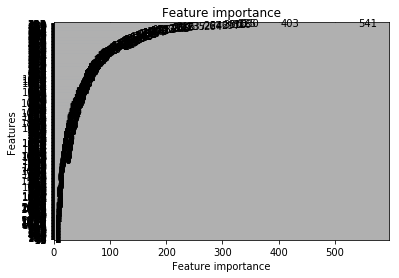

In [12]:
lgb.plot_importance(bst)

In [13]:
TOTAL_ROWS = 133223
ROWS = TOTAL_ROWS
test = pd.read_csv("./data/actual_test.csv", nrows=ROWS, usecols=USE_COLS, header=None, names = list(range(0, MAX_SIZE)))
ypred = bst.predict(test, num_iteration=bst.best_iteration)

df = pd.DataFrame(ypred)
df.to_csv('./data/predict.csv', index=False, header=False)